In [1]:
import pandas as pd
from datetime import datetime
import json
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Key for datasets and columns


In [2]:
list_of_file_names = glob.glob("./zip_2/*.csv")
#new_list = []
#for file_name in list_of_file_names:
 #   new = file_name.encode('utf-8').strip()
  #  new_list.append(new)

In [3]:
read_data_list_2 = []
fail_list = []
for i, data in enumerate(list_of_file_names):
    try:
        data = pd.read_csv(data)
        #data = unicode(data, errors='replace')
        read_data_list_2.append(data)
    except UnicodeDecodeError:
        fail_list.append(i)
#read_data_list
#fail_list
list_of_file_names_org = list_of_file_names
#del list_of_file_names[1]
#del list_of_file_names[3]

In [4]:
fail_list

[3]

In [5]:
for x in fail_list:
    del list_of_file_names[x]

In [6]:
len(list_of_file_names)

83

In [7]:
len(read_data_list_2)

83

In [8]:
read_data_list_2[40].head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-03,2010-04,2010-05,2010-06,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,...,2600.0,2600.0,2567.0,2508.5,2505.0,2510.0,2500.0,2500.0,2410.5,2577.0
1,60657,Chicago,IL,Chicago,Cook,2,NaN,NaN,NaN,NaN,...,1150.0,1100.0,1131.5,1125.0,1125.0,1095.0,1095.0,1094.0,1085.0,1075.0
2,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,NaN,...,2800.0,2800.0,2800.0,2755.0,2800.0,2755.0,2750.0,2765.0,2787.5,2765.0
3,60614,Chicago,IL,Chicago,Cook,4,NaN,NaN,NaN,NaN,...,1350.0,1325.0,1255.0,1250.0,1300.0,1350.0,1350.0,1400.0,1432.5,1405.0
4,79936,El Paso,TX,El Paso,El Paso,5,NaN,NaN,NaN,NaN,...,1000.0,995.0,995.0,995.0,995.0,995.0,975.0,995.0,985.0,995.0


In [83]:
len(read_data_list_2)

83

In [369]:
# build loop for data we can work with. All dates and zip
def build_useful_df(data_list):
    useful_df = []
    for dataset in range(len(data_list)):
        data = read_data_list_2[dataset]
        region_name = data['RegionName']
        new_df = data.select_dtypes(include=['float64'])
        new_df.insert(loc=0, column='RegionName', value=region_name) 
        new_df = new_df.sort_values('RegionName',ascending=False)
        new_df = new_df.set_index('RegionName')
        useful_df.append(new_df)
    return useful_df

In [371]:
useful_df = build_useful_df(read_data_list_2)
useful_df[3].head()

,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
RegionName,,,,,,,,,,,,,,,,,,,,,
99801,5.001480,12.059667,9.721639,12.823805,12.067908,6.735467,12.817048,5.351705,7.022677,11.403385,...,8.149935,7.839226,8.340472,11.016614,13.717871,12.825190,12.298428,13.377564,11.830469,10.323291
99709,13.332107,11.447750,20.230705,17.569812,9.501848,16.866147,25.336712,14.339757,14.388552,11.076664,...,15.020218,15.179652,9.608745,15.497014,13.444893,21.787553,14.004356,17.560603,14.040229,12.349473
99705,14.238275,11.455669,21.931982,19.715816,13.152595,16.048516,16.539511,13.047547,15.500396,18.073011,...,17.252181,14.419267,13.725248,14.145342,15.184207,21.538185,15.127410,18.841846,19.314115,18.508919
99701,12.502596,3.868248,11.226388,8.029469,11.557336,13.020347,6.255375,7.774582,10.831500,12.234200,...,11.990818,11.121010,13.573817,14.626545,17.361696,14.490435,12.286012,12.098577,12.474354,16.429898
99669,12.342694,9.547881,9.399721,11.789248,13.575353,8.824402,11.448679,12.713187,12.052649,9.105020,...,8.814888,10.137303,13.932264,12.073197,9.835698,14.488406,11.190449,15.390050,11.528148,13.687983


In [201]:
# parce list of data to make sure that it is multi-indexed and also is using only dataframes we want
# revisit df's that we left out for initial exploration
def df_build_dataframe(df_list, beginning, end):
    length = len(df_list[beginning:end])
    keys = []
    values = []
    final = []
    for x in range(length):
        y = str(x)
        keys.append(y)
    for df in df_list[beginning:end]:
        values.append(df)
    dictionary = dict(zip(keys, values))
    df = pd.concat(dictionary)
    return df

In [212]:
lst = df_build_dataframe(useful_df, 3, 71)

In [219]:
#[3:71]

In [214]:
len(lst)

351430

In [218]:
# Set index to zip?
lst[20000:30000]

1996-04  1996-05  1996-06  1996-07  1996-08  1996-09  1996-10  \
11 919        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   7448       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   9853       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   7346       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   4793       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   5998       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   6762       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   7945       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   4985       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   6583       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   8858       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   2327       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   8202       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   8360       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   7001       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   8153       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   7691       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   3246       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   5308       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   767        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   8943       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   9210       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   10027      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   126        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   8493       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   7095       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   10127      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   6016       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   5115       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   8273       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...           ...      ...      ...      ...      ...      ...      ...   
14 2717       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   5394       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   9807       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   6691       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   651        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   549        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   5985       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   4511       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   8758       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   9725       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   4890       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   5066       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   9130       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   8966       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   4924       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   7341       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   7136       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   8225       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   6571       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   6517       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   5987       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
   3721       NaN      NaN      NaN

In [220]:
# ------------ separate projects -----------------------

In [9]:
read_data_list_2[40].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 100 columns):
RegionName    647 non-null int64
City          647 non-null object
State         647 non-null object
Metro         647 non-null object
CountyName    647 non-null object
SizeRank      647 non-null int64
2010-03       1 non-null float64
2010-04       1 non-null float64
2010-05       2 non-null float64
2010-06       2 non-null float64
2010-07       3 non-null float64
2010-08       5 non-null float64
2010-09       13 non-null float64
2010-10       16 non-null float64
2010-11       24 non-null float64
2010-12       31 non-null float64
2011-01       67 non-null float64
2011-02       95 non-null float64
2011-03       113 non-null float64
2011-04       127 non-null float64
2011-05       140 non-null float64
2011-06       154 non-null float64
2011-07       167 non-null float64
2011-08       175 non-null float64
2011-09       185 non-null float64
2011-10       196 non-null float64
2011-11   

In [235]:
for data in read_data_list:
    data = data.head()
    print(data)

   RegionID  RegionName      City State     Metro CountyName  SizeRank  \
0     61639       10025  New York    NY  New York   New York         1   
1     84654       60657   Chicago    IL   Chicago       Cook         2   
2     84616       60614   Chicago    IL   Chicago       Cook         3   
3     93144       79936   El Paso    TX   El Paso    El Paso         4   
4     84640       60640   Chicago    IL   Chicago       Cook         5   

    1996-04   1996-05   1996-06   ...     2017-03  2017-04  2017-05  2017-06  \
0       NaN       NaN       NaN   ...     1117000  1133700  1178800  1240100   
1  138200.0  137500.0  137200.0   ...      304700   305600   306000   305400   
2  176900.0  174900.0  173700.0   ...      378900   372900   373500   378900   
3       NaN       NaN       NaN   ...      138500   138700   139200   139200   
4   97400.0   96200.0   95300.0   ...      190100   190300   191000   192400   

   2017-07  2017-08  2017-09  2017-10  2017-11  2017-12  
0  1284600  1294

   RegionID  RegionName      City   County State              Metro  SizeRank  \
0     84654       60657   Chicago     Cook    IL            Chicago         2   
1     84616       60614   Chicago     Cook    IL            Chicago         4   
2     93144       79936   El Paso  El Paso    TX            El Paso         5   
3     91733       77084   Houston   Harris    TX            Houston         8   
4     90668       75070  McKinney   Collin    TX  Dallas-Fort Worth        10   

     2010-09    2010-10    2010-11    ...        2017-03    2017-04  \
0  11.836482  12.926298  13.578425    ...      28.082852  25.781556   
1  10.583686  10.228192  13.048990    ...      15.306596  17.650569   
2  11.599742  12.463938  14.308883    ...      14.467526  14.684354   
3  16.930820  15.608901  13.695486    ...      14.842011  11.065269   
4  12.596835  12.138152  13.965941    ...      15.058663  14.824366   

     2017-05    2017-06    2017-07    2017-08    2017-09    2017-10  \
0  18.874661  2

In [142]:
columns_1 = read_data_list[5].columns
list(columns_1)

['RegionID',
 'RegionName',
 'City',
 'State',
 'Metro',
 'CountyName',
 'SizeRank',
 '1996-04',
 '1996-05',
 '1996-06',
 '1996-07',
 '1996-08',
 '1996-09',
 '1996-10',
 '1996-11',
 '1996-12',
 '1997-01',
 '1997-02',
 '1997-03',
 '1997-04',
 '1997-05',
 '1997-06',
 '1997-07',
 '1997-08',
 '1997-09',
 '1997-10',
 '1997-11',
 '1997-12',
 '1998-01',
 '1998-02',
 '1998-03',
 '1998-04',
 '1998-05',
 '1998-06',
 '1998-07',
 '1998-08',
 '1998-09',
 '1998-10',
 '1998-11',
 '1998-12',
 '1999-01',
 '1999-02',
 '1999-03',
 '1999-04',
 '1999-05',
 '1999-06',
 '1999-07',
 '1999-08',
 '1999-09',
 '1999-10',
 '1999-11',
 '1999-12',
 '2000-01',
 '2000-02',
 '2000-03',
 '2000-04',
 '2000-05',
 '2000-06',
 '2000-07',
 '2000-08',
 '2000-09',
 '2000-10',
 '2000-11',
 '2000-12',
 '2001-01',
 '2001-02',
 '2001-03',
 '2001-04',
 '2001-05',
 '2001-06',
 '2001-07',
 '2001-08',
 '2001-09',
 '2001-10',
 '2001-11',
 '2001-12',
 '2002-01',
 '2002-02',
 '2002-03',
 '2002-04',
 '2002-05',
 '2002-06',
 '2002-07',
 '2

In [22]:
#read_data_list[0].dropna()
read_data_list[5].nunique()

RegionID      12960
RegionName    12960
City           7114
State            44
Metro           550
CountyName      914
SizeRank      12960
1997-02        5045
1997-03        5015
1997-04        5063
1997-05        5118
1997-06        4978
1997-07        4997
1997-08        4980
1997-09        4966
1997-10        4955
1997-11        4949
1997-12        4996
1998-01        4983
1998-02        4955
1998-03        4890
1998-04        4903
1998-05        4755
1998-06        4850
1998-07        4748
1998-08        4759
1998-09        4659
1998-10        4703
1998-11        4732
1998-12        4629
              ...  
2015-07        5773
2015-08        5636
2015-09        5619
2015-10        5631
2015-11        5573
2015-12        5189
2016-01        5223
2016-02        5168
2016-03        5178
2016-04        5133
2016-05        4770
2016-06        4729
2016-07        4759
2016-08        4728
2016-09        4739
2016-10        4644
2016-11        4599
2016-12        4481
2017-01        4456


In [150]:
# Region name is zip code
read_data_list[5].sort_values('RegionName',ascending=False)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
7290,100478,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway,7291,221900.0,221900.0,221900.0,...,235200,243000,246000,242300,239600,238600,238600,238600,242600,249500
4083,100459,99801,Juneau,AK,Juneau,Juneau,4084,NaN,NaN,NaN,...,323100,324800,327400,330400,333500,335700,336500,338100,341100,342600
8585,100387,99712,Fairbanks,AK,Fairbanks,Fairbanks North Star,8586,NaN,NaN,NaN,...,243300,243200,244200,246500,249300,251300,252600,253900,255100,255900
4548,100384,99709,Fairbanks,AK,Fairbanks,Fairbanks North Star,4549,NaN,NaN,NaN,...,231200,231100,230800,231000,232100,233400,234700,236300,238300,239600
5522,100380,99705,North Pole,AK,Fairbanks,Fairbanks North Star,5523,NaN,NaN,NaN,...,213200,213500,213500,213800,214200,214900,216500,218400,220500,222500
5923,100376,99701,Fairbanks,AK,Fairbanks,Fairbanks North Star,5924,NaN,NaN,NaN,...,180000,179900,180400,181800,183000,183900,184900,186100,186900,187500
11152,100344,99664,Seward,AK,NaN,Kenai Peninsula,11153,NaN,NaN,NaN,...,218900,220100,220200,220900,222100,223500,224400,224900,226300,228200
3925,100334,99654,Tanaina,AK,Anchorage,Matanuska Susitna,3926,NaN,NaN,NaN,...,240700,239700,238700,238300,238300,238800,239900,240600,240100,239900
4195,100326,99645,Palmer,AK,Anchorage,Matanuska Susitna,4196,NaN,NaN,NaN,...,248900,248000,247400,247100,247400,248400,249800,250500,250100,250000
7236,100301,99615,Kodiak,AK,NaN,Kodiak Island,7237,260900.0,260900.0,260900.0,...,273200,273600,274000,274600,275400,276200,276800,277900,282500,288200


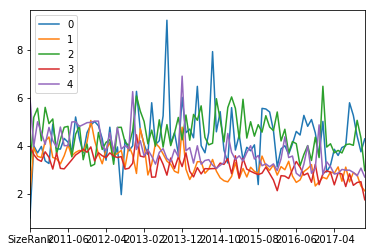

In [25]:
# Create a plot of rows. Needs better legend. Can use this to evaluate any number.
#plot_list = range(7)
def test_plot(read_data_list, plot_list, list_index, column_index):
    plot_slice_list = []
    plot_label = str(list_index)
    for num in plot_list:
        plot_slice = read_data_list[list_index].iloc[num, column_index:]
        plot_slice_list.append(plot_slice)
    for plot in plot_slice_list:
        plot.plot(legend=True)
test_plot(read_data_list_2, range(5), 28, 6)       


In [209]:
plot_slice = read_data_list[5].iloc[1, 6:]
plot_slice_2 = read_data_list[5].iloc[2, 6:]
plot_slice_us = read_data_list[5].iloc[0, 6:]
#plot_slice.plot()
#plot_slice_2.plot()
print(plot_slice)

SizeRank         2
1996-04     146700
1996-05     146500
1996-06     146300
1996-07     146300
1996-08     146800
1996-09     147100
1996-10     147300
1996-11     147800
1996-12     148600
1997-01     149100
1997-02     149600
1997-03     151100
1997-04     153200
1997-05     155100
1997-06     157200
1997-07     159100
1997-08     160000
1997-09     160800
1997-10     162200
1997-11     163200
1997-12     164100
1998-01     165600
1998-02     167400
1998-03     168000
1998-04     168100
1998-05     168500
1998-06     168900
1998-07     169100
1998-08     170200
             ...  
2015-07     308900
2015-08     308400
2015-09     308600
2015-10     310400
2015-11     311400
2015-12     310700
2016-01     311100
2016-02     312300
2016-03     314100
2016-04     316100
2016-05     316600
2016-06     316600
2016-07     316700
2016-08     317100
2016-09     316500
2016-10     316300
2016-11     317000
2016-12     318500
2017-01     318900
2017-02     319700
2017-03     321100
2017-04     

In [173]:
plot_slice.values

array([2, 146700.0, 146500.0, 146300.0, 146300.0, 146800.0, 147100.0,
       147300.0, 147800.0, 148600.0, 149100.0, 149600.0, 151100.0,
       153200.0, 155100.0, 157200.0, 159100.0, 160000.0, 160800.0,
       162200.0, 163200.0, 164100.0, 165600.0, 167400.0, 168000.0,
       168100.0, 168500.0, 168900.0, 169100.0, 170200.0, 172100.0,
       174500.0, 177100.0, 180500.0, 183200.0, 184900.0, 187100.0,
       189800.0, 191300.0, 192000.0, 193200.0, 195000.0, 197100.0,
       200100.0, 203100.0, 204800.0, 206100.0, 207900.0, 209900.0,
       212700.0, 216600.0, 219900.0, 223500.0, 227100.0, 229100.0,
       230300.0, 233000.0, 236200.0, 239700.0, 242900.0, 245400.0,
       248000.0, 250400.0, 252600.0, 254300.0, 257300.0, 261400.0,
       265100.0, 266200.0, 266500.0, 267100.0, 268000.0, 269000.0,
       269500.0, 269800.0, 270400.0, 272700.0, 276300.0, 279300.0,
       281900.0, 284600.0, 285400.0, 285200.0, 286200.0, 288900.0,
       291800.0, 295100.0, 298600.0, 300200.0, 299100.0, 29

In [174]:
plot_slice.index

Index(['SizeRank', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08',
       '1996-09', '1996-10', '1996-11', '1996-12',
       ...
       '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08',
       '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object', length=262)

In [175]:
x = plot_slice.index
y = plot_slice.values

In [196]:
new_x = datetime.strptime(x[10], "%Y-%m")
new_x

datetime.datetime(1997, 1, 1, 0, 0)

In [211]:
def convert_time(x, row_num):
    time_list = []
    for time in x[row_num:]:
        time = datetime.strptime(time, "%Y-%m")
        time_list.append(time)
    return time_list
time_list = convert_time(x, 1)

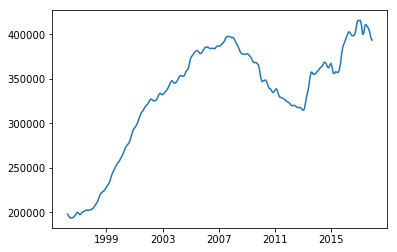

In [212]:
plt.plot(time_list, y[1:])

In [213]:
x_2 = plot_slice_2.index
time_list_2 = convert_time(x_2, 1)
y_2 = plot_slice_2.values

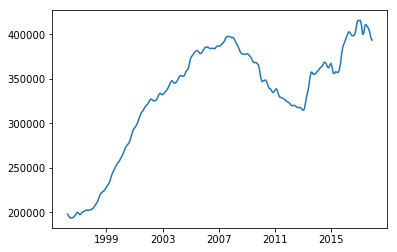

In [214]:
plt.plot(time_list_2, y_2[1:])

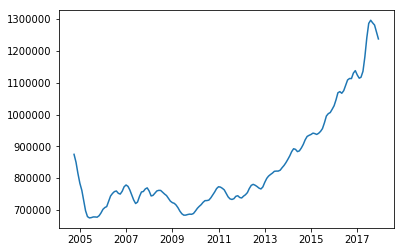

In [215]:
x_us = plot_slice_us.index
time_list_us = convert_time(x_us, 1)
y_us = plot_slice_us.values
plt.plot(time_list_us, y_us[1:])

In [123]:
import json
yelp_business = []
with open('./yelp_dataset/business.json') as data_file:    
    for line in data_file:
        data = json.loads(line)
        yelp_business.append(data)

In [124]:
df_yelp_business = pd.DataFrame(yelp_business)

treat dicts and lists within dfs like multi-index?

In [127]:
df_yelp_business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA
2,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ
3,"5000 Arizona Mills Cr, Ste 435","{'BusinessAcceptsCreditCards': True, 'Restaura...",8DShNS-LuFqpEWIp0HxijA,"[Sporting Goods, Shopping]",Tempe,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",0,33.383147,-111.964725,Sports Authority,,85282,9,3.0,AZ
4,581 Howe Ave,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",PfOCPjBrlQAnz__NXj9h_w,"[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{'Monday': '11:00-1:00', 'Tuesday': '11:00-1:0...",1,41.119535,-81.475690,Brick House Tavern + Tap,,44221,116,3.5,OH


In [128]:
yelp_review = []
with open('./yelp_dataset/review.json') as data_file_review:    
    for line in data_file_review:
        data = json.loads(line)
        yelp_review.append(data)

In [129]:
df_yelp_review = pd.DataFrame(yelp_review)

In [130]:
df_yelp_review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw
2,VR6GpWIda3SfvPC-lg9H3w,0,2016-05-28,0,n6QzIUObkYshz4dz2QRJTw,5,Small unassuming place that changes their menu...,0,bv2nCi5Qv5vroFiqKGopiw
3,CKC0-MOWMqoeWf6s-szl8g,0,2016-05-28,0,MV3CcKScW05u5LVfF6ok0g,5,Lester's is located in a beautiful neighborhoo...,0,bv2nCi5Qv5vroFiqKGopiw
4,ACFtxLv8pGrrxMm6EgjreA,0,2016-05-28,0,IXvOzsEMYtiJI0CARmj77Q,4,Love coming here. Yes the place always needs t...,0,bv2nCi5Qv5vroFiqKGopiw


In [27]:
read_data_list_2[28].head()

,RegionID,RegionName,City,County,State,Metro,SizeRank,2010-09,2010-10,2010-11,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,61639,10025,New York,New York,NY,New York,1,4.002965,3.703704,3.971666,...,3.196487,3.853565,3.596038,3.927409,4.000000,5.788386,5.263158,4.400000,3.750000,4.285714
1,84654,60657,Chicago,Cook,IL,Chicago,2,3.926782,3.559871,3.508772,...,2.912621,2.857143,3.121520,2.524924,3.112889,2.500000,2.884049,2.781641,2.327386,2.128246
2,61637,10023,New York,New York,NY,New York,3,5.181347,5.561735,4.210526,...,4.083333,3.707071,3.807615,3.700850,4.048805,4.074074,4.018801,5.058072,4.327660,2.968668
3,84616,60614,Chicago,Cook,IL,Chicago,4,3.634545,3.433476,3.351248,...,2.898551,2.375670,2.864865,2.827688,2.304981,2.834283,2.355905,2.472943,2.505157,1.755002
4,84640,60640,Chicago,Cook,IL,Chicago,6,3.973799,5.000000,4.545455,...,3.128059,2.823942,2.854904,3.016904,2.986043,2.985075,2.891030,2.751239,3.070571,2.700282


28
Average Rent Price, all homes
./zip_2/Zip_MedianPctOfPriceReduction_Condominum.csv


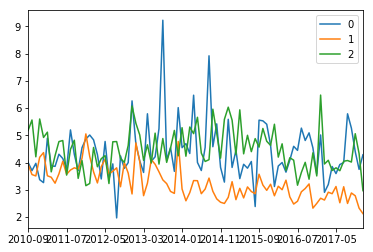

In [31]:
print(28)
print(list_of_file_names[28])
test_plot(read_data_list_2, range(3), 28, 7)   

In [38]:
read_data_list_2[27].head()

,RegionID,RegionName,City,County,State,Metro,SizeRank,2010-09,2010-10,2010-11,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,61639,10025,New York,New York,NY,New York,1,4.002965,3.629537,3.478425,...,3.267974,3.853565,3.596038,3.927409,4.000000,5.788386,4.892885,4.283333,4.468918,5.615079
1,84654,60657,Chicago,Cook,IL,Chicago,2,3.797539,3.584229,3.511855,...,2.886914,2.839230,3.121520,2.600780,2.957531,2.421011,2.778086,2.783578,2.222222,2.186330
2,61637,10023,New York,New York,NY,New York,3,5.181347,5.453473,4.185263,...,4.083333,3.921569,3.829734,3.703704,4.048805,4.074074,3.870968,5.238095,4.327660,2.777778
3,84616,60614,Chicago,Cook,IL,Chicago,4,3.790087,3.423968,3.626281,...,3.125000,3.069368,3.003003,3.204272,2.780482,2.847249,2.665205,2.632965,2.618858,2.174874
4,93144,79936,El Paso,El Paso,TX,El Paso,5,3.410888,3.740610,4.000000,...,3.178990,3.576814,2.595938,2.872237,2.831863,3.340659,3.303707,3.678181,2.838164,2.916667


27
./zip_2/Zip_MedianPctOfPriceReduction_AllHomes.csv


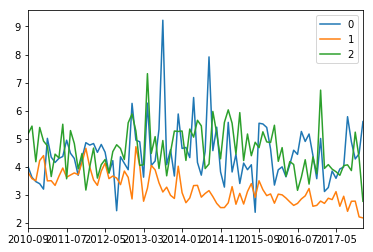

In [34]:
print(27)
print(list_of_file_names[27])
test_plot(read_data_list_2, range(3), 27, 7)   

In [37]:
read_data_list_2[26].head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,60657,Chicago,IL,Chicago,Cook,1,370.129870,370.616099,376.062786,372.034665,...,436.855080,435.897436,442.648810,433.196534,439.045183,440.018527,448.949368,439.840909,428.900843,426.308843
1,77494,Cinco Ranch,TX,Houston,Fort Bend,2,97.972670,97.759717,97.799511,98.294070,...,120.826709,121.105904,121.581844,121.340684,120.761813,120.543705,120.543705,120.953003,120.587132,120.708492
2,75070,McKinney,TX,Dallas-Fort Worth,Collin,3,85.983128,87.204874,86.639243,86.610487,...,137.693632,137.843601,138.056266,137.745303,136.718750,136.951055,137.837186,139.906712,140.638084,141.891480
3,60614,Chicago,IL,Chicago,Cook,4,412.953606,389.213775,394.900366,387.041416,...,532.222222,524.930748,523.809524,518.427518,522.763007,522.583461,522.655367,522.727273,532.222222,534.884859
4,79936,El Paso,TX,El Paso,El Paso,5,88.318303,87.768380,87.768380,87.857052,...,85.608515,85.277554,85.336326,86.568278,87.168277,87.096774,86.596180,86.541245,87.753511,88.087248


26
./zip_2/Zip_MedianListingPricePerSqft_Sfr.csv


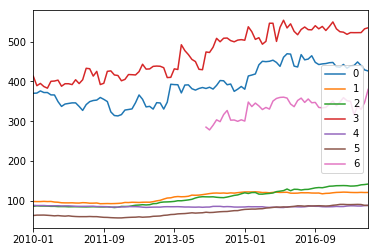

In [48]:
print(26)
print(list_of_file_names[26])
test_plot(read_data_list_2, range(7), 26, 6)   

In [39]:
read_data_list_2[25].head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,10467,New York,NY,New York,Bronx,1,NaN,NaN,NaN,NaN,...,234.146341,226.814516,234.307359,235.073378,234.146341,246.822034,250.000000,260.197226,260.557053,259.837398
1,11226,New York,NY,New York,Kings,2,NaN,NaN,NaN,NaN,...,379.546081,377.658338,381.433824,389.554795,388.952155,388.349515,407.456672,406.740267,405.959752,380.149512
2,11235,New York,NY,New York,Kings,3,329.014446,327.982488,330.046404,330.725362,...,513.364391,509.170085,516.884532,519.193165,516.884532,521.682146,527.966297,500.400391,500.345066,476.999440
3,90046,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,4,NaN,NaN,NaN,NaN,...,670.536140,639.855274,631.793478,663.672655,680.645161,732.581967,761.772853,771.048110,743.368546,711.669390
4,10462,New York,NY,New York,Bronx,5,205.729167,208.253381,204.078659,201.257760,...,236.434109,240.048251,222.030981,224.632353,239.391144,265.090909,291.245791,274.147727,274.497204,288.750601


25
./zip_2/Zip_MedianListingPricePerSqft_DuplexTriplex.csv


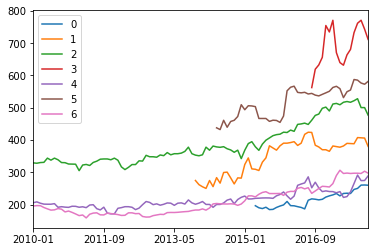

In [49]:
print(25)
print(list_of_file_names[25])
test_plot(read_data_list_2, range(7), 25, 6)   

In [41]:
read_data_list_2[24].head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,10025,New York,NY,New York,New York,1,915.371725,914.076782,935.294118,952.380952,...,1407.843137,1461.245235,1432.271492,1427.199640,1431.392729,1461.590755,1481.351139,1481.351139,1508.841177,1525.235591
1,10023,New York,NY,New York,New York,2,NaN,NaN,NaN,NaN,...,1983.088324,1974.085366,1972.123369,1965.006729,1981.027732,1956.673655,1959.454569,1941.612604,1963.582677,1987.500000
2,10002,New York,NY,New York,New York,3,NaN,NaN,NaN,NaN,...,1995.645864,1969.530523,1960.111645,1963.689781,1992.753623,1992.966002,2000.000000,1997.561045,2028.881446,2030.259366
3,10467,New York,NY,New York,Bronx,4,NaN,NaN,NaN,NaN,...,158.823529,158.957219,159.544788,159.998667,159.998667,185.185185,174.410774,185.774411,163.636364,163.636364
4,94109,San Francisco,CA,San Francisco,San Francisco,5,NaN,NaN,NaN,NaN,...,1101.684572,1112.903226,1153.715937,1153.715937,1125.816993,1089.331620,1074.358974,1134.740260,1234.202838,1230.502600


24
./zip_2/Zip_MedianListingPricePerSqft_CondoCoop.csv


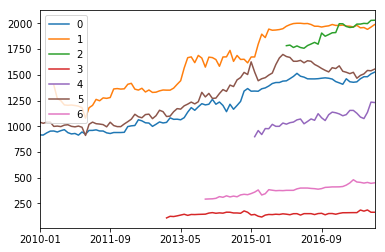

In [50]:
print(24)
print(list_of_file_names[24])
test_plot(read_data_list_2, range(7), 24, 6)   

In [51]:
read_data_list_2[23].head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,10025,New York,NY,New York,New York,1,922.958398,916.666667,941.103456,968.191484,...,1400.000000,1459.330144,1426.799007,1423.990499,1426.799007,1459.330144,1477.501507,1470.588235,1482.004234,1513.257576
1,60657,Chicago,IL,Chicago,Cook,2,NaN,NaN,NaN,NaN,...,423.166942,422.861955,425.000000,424.434223,420.257034,418.483390,420.000000,412.450000,414.285714,416.860972
2,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,NaN,...,1986.695657,1974.723539,1977.798516,1967.837920,1982.055465,1960.330127,1955.326460,1937.406855,1955.159714,1983.055556
3,77494,Cinco Ranch,TX,Houston,Fort Bend,4,97.972670,97.759717,97.799511,98.294070,...,120.833333,121.122779,121.591181,121.340684,120.761813,120.543705,120.543705,120.953003,120.587132,120.708492
4,75070,McKinney,TX,Dallas-Fort Worth,Collin,5,86.318091,87.391849,86.834734,86.776860,...,138.351844,138.542361,138.972254,138.544251,137.189850,137.457449,138.572986,140.291522,141.400919,142.283393


23
./zip_2/Zip_MedianListingPricePerSqft_AllHomes.csv


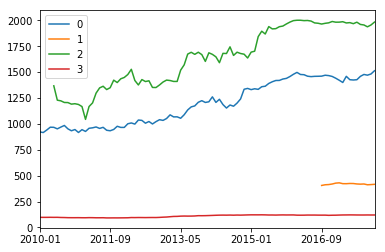

In [52]:
print(23)
print(list_of_file_names[23])
test_plot(read_data_list_2, range(4), 23, 6)   

In [53]:
read_data_list_2[22].head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,60657,Chicago,IL,Chicago,Cook,1,NaN,NaN,NaN,NaN,...,424.554794,423.177083,431.313131,429.032258,425.516129,419.354839,443.745164,439.000000,410.171809,410.363628
1,77494,Cinco Ranch,TX,Houston,Fort Bend,2,104.879774,102.040816,105.239143,106.148697,...,120.877915,121.349115,122.770742,123.399825,122.817067,121.978145,121.418358,123.042506,122.625791,124.222176
2,75070,McKinney,TX,Dallas-Fort Worth,Collin,3,102.299379,103.081745,102.299379,103.605244,...,135.911179,137.845584,136.047092,134.201567,133.737466,134.058403,132.048604,134.342041,131.775111,132.050368
3,60614,Chicago,IL,Chicago,Cook,4,NaN,NaN,NaN,NaN,...,556.904122,555.144142,558.664102,559.504465,582.583810,565.625000,568.750000,568.750000,590.164333,608.341811
4,60618,Chicago,IL,Chicago,Cook,5,NaN,NaN,NaN,NaN,...,310.955276,314.550089,303.148521,301.852598,300.926299,305.761218,312.500000,316.697287,313.911472,301.838637


22
./zip_2/Zip_MedianListingPricePerSqft_5BedroomOrMore.csv


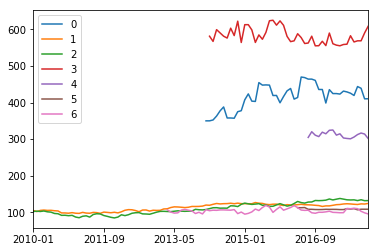

In [54]:
print(22)
print(list_of_file_names[22])
test_plot(read_data_list_2, range(7), 22, 6)   

In [55]:
read_data_list_2[21].head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,60657,Chicago,IL,Chicago,Cook,1,NaN,NaN,NaN,NaN,...,415.398775,420.772872,428.679654,454.925373,454.925373,460.000000,455.194030,433.971903,435.087025,446.728972
1,10023,New York,NY,New York,New York,2,NaN,NaN,NaN,NaN,...,2439.423707,2439.423707,2500.000000,2425.742574,2492.451155,2492.451155,2439.423707,2428.630363,2425.742574,2425.742574
2,77494,Cinco Ranch,TX,Houston,Fort Bend,3,95.591458,95.169018,95.162663,96.268423,...,118.999000,119.159751,119.287950,118.654809,118.161531,118.545242,118.523255,118.251971,117.252629,117.447820
3,75070,McKinney,TX,Dallas-Fort Worth,Collin,4,83.087481,83.128985,82.222222,82.946261,...,131.030375,132.729641,133.408445,132.548064,131.406045,131.286238,132.427833,134.006066,133.091727,133.680927
4,60614,Chicago,IL,Chicago,Cook,5,422.808765,413.133402,412.953606,413.133402,...,545.784419,547.225521,558.259442,526.249686,544.320758,550.495524,550.495524,515.873016,518.504442,523.280753


21
./zip_2/Zip_MedianListingPricePerSqft_4Bedroom.csv


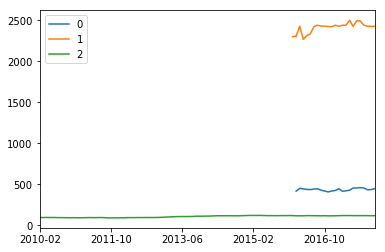

In [58]:
print(21)
print(list_of_file_names[21])
test_plot(read_data_list_2, range(3), 21, 7)   

In [59]:
read_data_list_2[20].head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,60657,Chicago,IL,Chicago,Cook,1,NaN,NaN,NaN,NaN,...,437.158470,430.808244,433.894664,426.486486,424.454007,414.877809,421.979356,423.193685,421.979356,423.193685
1,10023,New York,NY,New York,New York,2,NaN,NaN,NaN,NaN,...,2047.835336,2047.835336,2064.083458,2053.941909,2055.286901,2034.400949,2013.450327,2027.500100,2131.280096,2147.302905
2,77494,Cinco Ranch,TX,Houston,Fort Bend,3,97.979364,98.236228,97.672485,96.913137,...,126.968445,126.782834,125.997883,124.398810,124.271845,124.299186,124.299186,124.166787,125.000000,124.649593
3,75070,McKinney,TX,Dallas-Fort Worth,Collin,4,86.773547,89.367719,89.776941,89.250436,...,148.232010,147.035012,148.682248,149.197780,148.724092,149.624521,150.958466,152.352720,154.213727,154.317991
4,60614,Chicago,IL,Chicago,Cook,5,359.213756,337.344580,330.551990,317.582917,...,426.470588,414.146552,409.338235,384.782609,385.122582,420.113421,432.549505,440.466255,468.356179,497.368421


20
./zip_2/Zip_MedianListingPricePerSqft_3Bedroom.csv


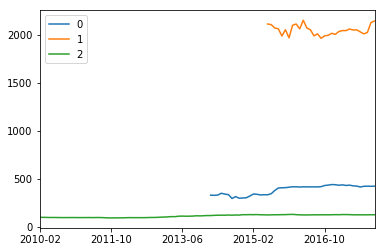

In [62]:
print(20)
print(list_of_file_names[20])
test_plot(read_data_list_2, range(3), 20, 7)   

In [63]:
read_data_list_2[19].head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,10023,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,...,1970.909091,1948.772788,1948.772788,1958.356936,1963.986600,1980.304908,1963.986600,1915.633609,1934.545455,1944.818304
1,10002,New York,NY,New York,New York,2,NaN,NaN,NaN,NaN,...,2162.634653,2069.301911,2030.548068,2059.174217,2069.301911,2062.192438,2049.121663,2062.192438,2088.167053,2110.839446
2,94109,San Francisco,CA,San Francisco,San Francisco,3,NaN,NaN,NaN,NaN,...,1103.067485,1086.180124,1212.335693,1171.047639,1159.600998,1097.151998,1104.972376,1142.823618,1247.963801,1272.984441
3,10016,New York,NY,New York,New York,4,NaN,NaN,NaN,NaN,...,2008.680280,1924.813608,1939.585637,1994.590940,1795.366795,1863.239247,1654.285714,1895.355045,1871.736662,1925.781250
4,11375,New York,NY,New York,Queens,5,NaN,NaN,NaN,NaN,...,413.571429,429.000000,454.400000,454.283333,449.285714,449.285714,437.326892,444.973228,438.495370,440.740741


19
./zip_2/Zip_MedianListingPricePerSqft_2Bedroom.csv


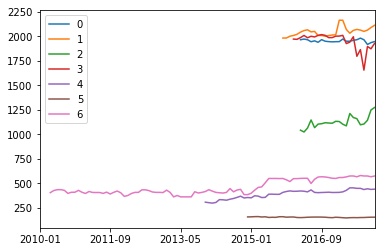

In [65]:
print(19)
print(list_of_file_names[19])
test_plot(read_data_list_2, range(7), 19, 6)   

In [66]:
read_data_list_2[18].head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,10023,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,...,1849.499395,1840.383476,1840.849025,1849.836779,1866.040328,1866.158868,1870.127191,1849.162011,1857.879283,1826.516220
1,10002,New York,NY,New York,New York,2,NaN,NaN,NaN,NaN,...,1886.648555,1825.688073,1832.061069,1874.157541,1933.908046,1933.908046,1945.323741,1944.644629,1959.016393,1960.111645
2,10016,New York,NY,New York,New York,3,NaN,NaN,NaN,NaN,...,1689.189189,1586.609769,1416.058394,1348.484848,1382.271621,1621.263507,1481.751825,1577.020202,1545.454545,1598.540146
3,11375,New York,NY,New York,Queens,4,NaN,NaN,NaN,NaN,...,413.846154,425.531915,443.333333,464.705882,434.705882,398.934840,378.533333,398.571429,413.793103,410.809595
4,10128,New York,NY,New York,New York,5,NaN,NaN,NaN,NaN,...,1462.639110,1449.041921,1456.315942,1466.775599,1462.801036,1462.962963,1461.916462,1424.021838,1398.377455,1387.702818


18
./zip_2/Zip_MedianListingPricePerSqft_1Bedroom.csv


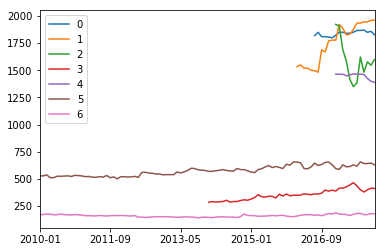

In [67]:
print(18)
print(list_of_file_names[18])
test_plot(read_data_list_2, range(7), 18, 6) 

In [68]:
read_data_list_2[17].head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,60657,Chicago,IL,Chicago,Cook,1,NaN,NaN,NaN,NaN,...,1199250.0,1249000.0,1249000.0,1299000.0,1282500.0,1299000.0,1232500.0,1207500.0,1200000.0,1249999.0
1,77494,Cinco Ranch,TX,Houston,Fort Bend,2,285000.0,285000.0,289900.0,289055.0,...,374000.0,379000.0,380000.0,379900.0,375000.0,375000.0,374925.0,374900.0,369900.0,366449.5
2,75070,McKinney,TX,Dallas-Fort Worth,Collin,3,194700.0,195000.0,194500.0,198375.0,...,368500.0,374945.0,373990.0,369000.0,352990.0,350000.0,362500.0,369997.5,367610.0,368950.0
3,60614,Chicago,IL,Chicago,Cook,4,NaN,NaN,NaN,NaN,...,1599500.0,1650000.0,1650000.0,1579000.0,1599000.0,1599000.0,1550000.0,1525000.0,1549950.0,1549950.0
4,79936,El Paso,TX,El Paso,El Paso,5,134900.0,130000.0,129900.0,129900.0,...,139900.0,139900.0,139700.0,139975.0,139900.0,139900.0,139000.0,139000.0,135000.0,139500.0


17
./zip_2/Zip_MedianListingPrice_Sfr.csv


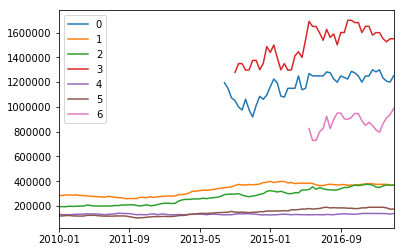

In [70]:
print(17)
print(list_of_file_names[17])
test_plot(read_data_list_2, range(7), 17, 6) 

In [71]:
read_data_list_2[16].head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,10467,New York,NY,New York,Bronx,1,495000.0,519000.0,499000.0,499000.0,...,579000.0,575000.0,577000.0,575000.0,575000.0,570000.0,550000.0,577000.0,575000.0,555000.0
1,11226,New York,NY,New York,Kings,2,NaN,NaN,NaN,NaN,...,928000.0,955000.0,1099500.0,1200000.0,1145000.0,1022000.0,999000.0,999000.0,999000.0,989999.0
2,11235,New York,NY,New York,Kings,3,654500.0,654500.0,650000.0,650000.0,...,1069000.0,999000.0,1019000.0,999999.0,999999.0,999999.0,1009499.5,1100000.0,1150000.0,1149000.0
3,60647,Chicago,IL,Chicago,Cook,4,NaN,NaN,NaN,NaN,...,495000.0,492500.0,484000.0,499900.0,490000.0,499950.0,544500.0,580000.0,599000.0,589900.0
4,60618,Chicago,IL,Chicago,Cook,5,NaN,NaN,NaN,NaN,...,499000.0,505000.0,524950.0,499000.0,499999.0,494000.0,499000.0,487000.0,475000.0,459900.0


16
./zip_2/Zip_MedianListingPrice_DuplexTriplex.csv


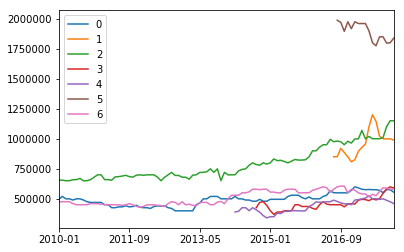

In [72]:
print(16)
print(list_of_file_names[16])
test_plot(read_data_list_2, range(7), 16, 6) 

In [73]:
read_data_list_2[15].head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,10025,New York,NY,New York,New York,1,750000.0,737500.0,775000.0,725000.0,...,1425000.0,1490000.0,1450000.0,1395000.0,1300000.0,1307500.0,1295000.0,1395000.0,1437500.0,1485000.0
1,60657,Chicago,IL,Chicago,Cook,2,NaN,NaN,NaN,NaN,...,440000.0,435000.0,427000.0,440000.0,435000.0,435000.0,449900.0,449950.0,449950.0,469499.5
2,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,NaN,...,2490000.0,2395000.0,2365000.0,2395000.0,2495000.0,2395000.0,2375000.0,2370000.0,2390000.0,2422500.0
3,60614,Chicago,IL,Chicago,Cook,4,NaN,NaN,NaN,NaN,...,538450.0,535000.0,519600.0,499950.0,509500.0,524950.0,549000.0,549000.0,599000.0,624900.0
4,10002,New York,NY,New York,New York,5,NaN,NaN,NaN,NaN,...,1573000.0,1600000.0,1575000.0,1575000.0,1577500.0,1580000.0,1610000.0,1610000.0,1670000.0,1630000.0


15
./zip_2/Zip_MedianListingPrice_CondoCoop.csv


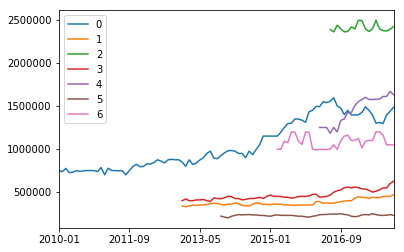

In [74]:
print(15)
print(list_of_file_names[15])
test_plot(read_data_list_2, range(7), 15, 6) 

In [75]:
read_data_list_2[14].head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,10025,New York,NY,New York,New York,1,775000.0,725000.0,762500.0,725000.0,...,1450000.0,1497500.0,1467000.0,1400000.0,1332500.0,1325000.0,1295000.0,1397500.0,1485000.0,1537500.0
1,60657,Chicago,IL,Chicago,Cook,2,349900.0,349000.0,339169.5,346900.0,...,510000.0,499900.0,499000.0,500000.0,485000.0,485000.0,514000.0,500000.0,500000.0,529900.0
2,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,NaN,...,2505000.0,2462500.0,2397500.0,2425000.0,2500000.0,2405000.0,2395000.0,2390000.0,2450000.0,2495000.0
3,77494,Cinco Ranch,TX,Houston,Fort Bend,4,285000.0,285000.0,289900.0,289055.0,...,373997.5,379000.0,380000.0,379900.0,375000.0,375000.0,374950.0,374900.0,369900.0,366909.0
4,75070,McKinney,TX,Dallas-Fort Worth,Collin,5,191315.0,194900.0,190995.0,195000.0,...,367990.0,374400.0,371995.0,368022.0,351593.5,350000.0,361092.0,369900.0,365000.0,368950.0


14
./zip_2/Zip_MedianListingPrice_AllHomes.csv


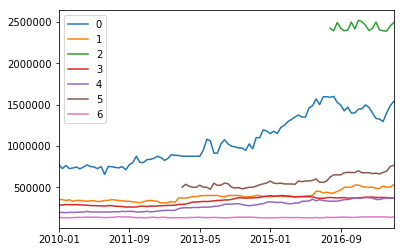

In [76]:
print(14)
print(list_of_file_names[14])
test_plot(read_data_list_2, range(7), 14, 6) 

In [77]:
read_data_list_2[13].head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,60657,Chicago,IL,Chicago,Cook,1,NaN,NaN,NaN,NaN,...,1449900.0,1449950.0,1449900.0,1497900.0,1499000.0,1498450.0,1499250.0,1499000.0,1499000.0,1550000.0
1,77494,Cinco Ranch,TX,Houston,Fort Bend,2,420266.0,420266.0,434900.0,420900.0,...,499000.0,499250.0,499900.0,517990.0,499900.0,490000.0,477475.0,479967.0,475000.0,497500.0
2,75070,McKinney,TX,Dallas-Fort Worth,Collin,3,375000.0,389900.0,370500.0,375000.0,...,495000.0,512985.5,506284.0,514142.0,509321.0,510284.0,509150.0,504150.0,510356.0,524304.0
3,60614,Chicago,IL,Chicago,Cook,4,NaN,NaN,NaN,NaN,...,2275000.0,2285000.0,2495000.0,2399000.0,2395000.0,2395000.0,2350000.0,2300000.0,2500000.0,2599999.0
4,60647,Chicago,IL,Chicago,Cook,5,NaN,NaN,NaN,NaN,...,554750.0,589500.0,609950.0,611000.0,625000.0,611000.0,624500.0,649000.0,675000.0,649999.5


13
./zip_2/Zip_MedianListingPrice_5BedroomOrMore.csv


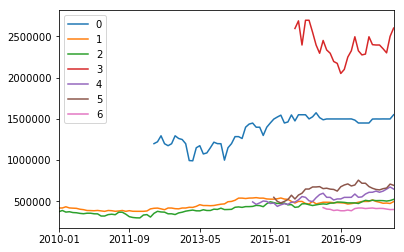

In [78]:
print(13)
print(list_of_file_names[13])
test_plot(read_data_list_2, range(7), 13, 6) 

In [79]:
read_data_list_2[12].head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,60657,Chicago,IL,Chicago,Cook,1,NaN,NaN,NaN,NaN,...,1099900.0,1129900.0,1175000.0,1225000.0,1232000.0,1225000.0,1195000.0,1195000.0,1195000.0,1195000.0
1,10023,New York,NY,New York,New York,2,NaN,NaN,NaN,NaN,...,6990000.0,6925000.0,7290000.0,6800000.0,6995000.0,6995000.0,6995000.0,6835000.0,6695000.0,6685000.0
2,77494,Cinco Ranch,TX,Houston,Fort Bend,3,285000.0,282450.0,287950.0,287489.0,...,369950.0,374549.5,375000.0,374925.0,370005.0,370000.0,369994.5,371970.0,369900.0,366992.5
3,75070,McKinney,TX,Dallas-Fort Worth,Collin,4,219195.0,219500.0,215000.0,219500.0,...,389900.0,394975.0,389950.0,380990.0,368000.0,360000.0,379807.0,389900.0,379900.0,385000.0
4,60614,Chicago,IL,Chicago,Cook,5,NaN,NaN,NaN,NaN,...,1388000.0,1475000.0,1499000.0,1549000.0,1550000.0,1512500.0,1484000.0,1337500.0,1262500.0,1289000.0


12
./zip_2/Zip_MedianListingPrice_4Bedroom.csv


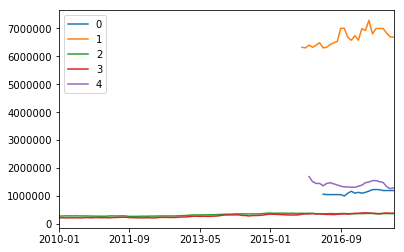

In [81]:
print(12)
print(list_of_file_names[12])
test_plot(read_data_list_2, range(5), 12, 6) 

In [82]:
read_data_list_2[11].head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,60657,Chicago,IL,Chicago,Cook,1,560000.0,569900.0,549450.0,549000.0,...,790000.0,765000.0,775000.0,772450.0,750000.0,744500.0,744500.0,750000.0,750000.0,749724.0
1,10023,New York,NY,New York,New York,2,NaN,NaN,NaN,NaN,...,4305000.0,4220000.0,4335000.0,4185000.0,4170000.0,4140000.0,4140000.0,4125000.0,4835000.0,4970000.0
2,77494,Cinco Ranch,TX,Houston,Fort Bend,3,199900.0,209900.0,204951.0,199999.5,...,283990.0,285000.0,280000.0,270000.0,268990.0,275000.0,275000.0,274990.0,270000.0,271000.0
3,75070,McKinney,TX,Dallas-Fort Worth,Collin,4,NaN,NaN,NaN,NaN,...,320060.0,318826.5,324900.0,313759.0,308092.0,306514.5,320000.0,324942.0,325000.0,328787.5
4,60614,Chicago,IL,Chicago,Cook,5,NaN,NaN,NaN,NaN,...,949000.0,850000.0,854950.0,799950.0,799900.0,859500.0,875000.0,887500.0,900400.0,909950.0


11
./zip_2/Zip_MedianListingPrice_3Bedroom.csv


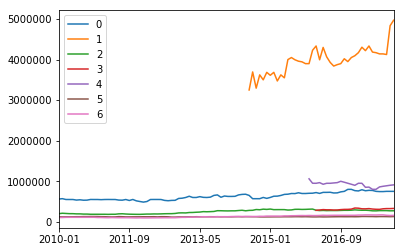

In [83]:
print(11)
print(list_of_file_names[11])
test_plot(read_data_list_2, range(7), 11, 6) 

In [84]:
read_data_list_2[10].head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,...,1425000.0,1385000.0,1300000.0,1299944.0,1395000.0,1300000.0,1200000.0,1295000.0,1395000.0,1395000.0
1,60657,Chicago,IL,Chicago,Cook,2,NaN,NaN,NaN,NaN,...,499000.0,459000.0,459000.0,499900.0,499450.0,499950.0,499900.0,475000.0,479999.5,499950.0
2,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,NaN,...,2742500.0,2700000.0,2680000.0,2705000.0,2730000.0,2750000.0,2735000.0,2695000.0,2750000.0,2800000.0
3,60614,Chicago,IL,Chicago,Cook,4,375000.0,389900.0,389900.0,399000.0,...,644500.0,580000.0,566950.0,599000.0,650000.0,599000.0,599000.0,636250.0,636250.0,636250.0
4,10002,New York,NY,New York,New York,5,NaN,NaN,NaN,NaN,...,2475000.0,2378000.0,2358000.0,2366000.0,2366000.0,2366000.0,2392000.0,2455000.0,2500000.0,2523000.0


10
./zip_2/Zip_MedianListingPrice_2Bedroom.csv


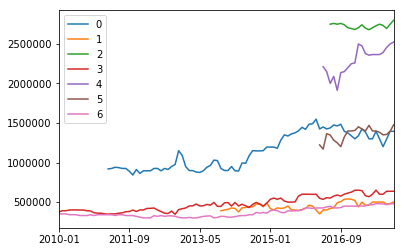

In [85]:
print(10)
print(list_of_file_names[10])
test_plot(read_data_list_2, range(7), 10, 6) 

In [86]:
read_data_list_2[9].head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,...,712000.0,699000.0,789500.0,750000.0,699000.0,722000.0,699000.0,745000.0,730000.0,745000.0
1,10023,New York,NY,New York,New York,2,NaN,NaN,NaN,NaN,...,1527500.0,1450000.0,1395000.0,1499000.0,1542500.0,1580000.0,1570000.0,1510000.0,1500000.0,1500000.0
2,10016,New York,NY,New York,New York,3,NaN,NaN,NaN,NaN,...,899000.0,935000.0,899000.0,899000.0,895000.0,899000.0,925000.0,992500.0,952525.0,999999.0
3,11375,New York,NY,New York,Queens,4,235000.0,229000.0,229000.0,229000.0,...,298884.0,298888.0,299000.0,299999.0,299000.0,291944.0,289000.0,299000.0,299999.0,299499.5
4,10128,New York,NY,New York,New York,5,NaN,NaN,NaN,NaN,...,1020000.0,1011250.0,998750.0,1002500.0,995000.0,995000.0,975000.0,999000.0,955000.0,929500.0


9
./zip_2/Zip_MedianListingPrice_1Bedroom.csv


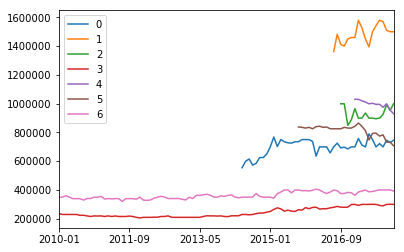

In [87]:
print(9)
print(list_of_file_names[9])
test_plot(read_data_list_2, range(7), 9, 6) 

In [88]:
read_data_list_2[8].head()

,RegionID,RegionName,City,County,State,Metro,SizeRank,2010-09,2010-10,2010-11,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,84654,60657,Chicago,Cook,IL,Chicago,2,15000.0,20000.0,34000.0,...,40000.0,30000.0,39450.0,45100.0,25100.0,26000.0,25100.0,25000.0,24550.0,49500.0
1,84616,60614,Chicago,Cook,IL,Chicago,4,27500.0,25000.0,24950.0,...,69500.0,50000.0,50000.0,50000.0,75000.0,49100.0,50000.0,55000.0,48000.0,60000.0
2,93144,79936,El Paso,El Paso,TX,El Paso,5,5000.0,5000.5,5100.0,...,5000.0,5000.0,4000.0,5000.0,5000.0,4675.0,5000.0,5000.0,4000.0,5000.0
3,91733,77084,Houston,Harris,TX,Houston,8,5000.0,5000.0,5000.0,...,5000.0,6000.0,5300.0,5000.0,5000.0,5000.0,5000.0,6000.0,10000.0,5100.0
4,90668,75070,McKinney,Collin,TX,Dallas-Fort Worth,10,5100.0,5090.0,5100.0,...,8000.0,9421.5,8950.0,9000.0,7000.0,6200.0,7000.0,6000.0,5100.0,5900.0


8
./zip_2/Zip_Median_PriceCut_Dollar_SingleFamilyResidence.csv


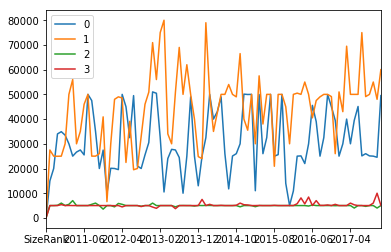

In [90]:
print(8)
print(list_of_file_names[8])
test_plot(read_data_list_2, range(4), 8, 6) 

In [91]:
read_data_list_2[7].head()

,RegionID,RegionName,City,County,State,Metro,SizeRank,2010-09,2010-10,2010-11,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,61639,10025,New York,New York,NY,New York,1,30000.0,27322.0,26000.0,...,45500.0,50000.0,50000.0,52000.0,50000.0,73000.0,100000.0,55000.0,54000.0,55000.0
1,84654,60657,Chicago,Cook,IL,Chicago,2,10000.0,10000.0,10000.0,...,10000.0,12500.0,10000.0,10000.0,14900.0,10000.0,10000.0,10000.0,10000.0,5050.0
2,61637,10023,New York,New York,NY,New York,3,50000.0,50000.0,40000.0,...,100000.0,85500.0,55000.0,52500.0,87500.0,70000.0,100000.0,100000.0,76000.0,50500.0
3,84616,60614,Chicago,Cook,IL,Chicago,4,12000.0,10000.0,10500.0,...,15000.0,14000.0,15000.0,14000.0,10000.0,15000.0,10000.0,10000.0,10099.5,6000.0
4,84640,60640,Chicago,Cook,IL,Chicago,6,10000.0,10000.0,10000.0,...,6000.0,6000.0,5100.0,6000.0,6000.0,7500.0,6000.0,6250.0,5100.0,5000.0


7
./zip_2/Zip_Median_PriceCut_Dollar_Condominum.csv


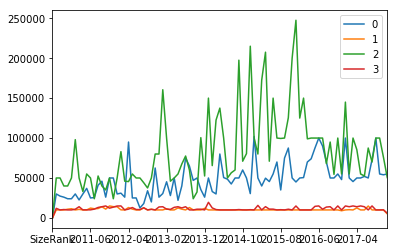

In [93]:
print(7)
print(list_of_file_names[7])
test_plot(read_data_list_2, range(4), 7, 6) 

In [94]:
read_data_list_2[6].head()

,RegionID,RegionName,City,County,State,Metro,SizeRank,2010-09,2010-10,2010-11,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,61639,10025,New York,New York,NY,New York,1,30000.0,29000.0,25500.0,...,46000.0,50000.0,50000.0,52000.0,50000.0,73000.0,102000.0,55000.0,57000.0,62000.0
1,84654,60657,Chicago,Cook,IL,Chicago,2,10000.0,10100.0,12000.0,...,15950.0,19999.5,14100.0,15000.0,16000.0,10650.0,14000.0,14050.0,11000.0,5500.0
2,61637,10023,New York,New York,NY,New York,3,50000.0,50000.0,37000.0,...,100000.0,96000.0,60000.0,100000.0,97500.0,70000.0,100000.0,100000.0,76000.0,51000.0
3,84616,60614,Chicago,Cook,IL,Chicago,4,16000.0,12000.0,13450.0,...,24000.0,24000.0,20900.0,20000.0,15000.0,20000.0,16000.0,15001.0,13500.0,14200.0
4,93144,79936,El Paso,El Paso,TX,El Paso,5,5000.0,5000.5,5100.0,...,5000.0,5000.0,4000.0,5000.0,5000.0,4600.0,5000.0,5000.0,4275.0,5000.0


6
./zip_2/Zip_Median_PriceCut_Dollar_AllHomes.csv


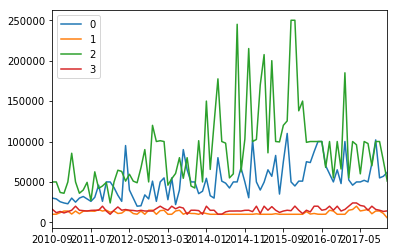

In [97]:
print(6)
print(list_of_file_names[6])
test_plot(read_data_list_2, range(4), 6, 7) 

In [98]:
read_data_list_2[5].head()

,RegionID,RegionName,City,County,State,Metro,SizeRank,2010-09,2010-10,2010-11,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,84654,60657,Chicago,Cook,IL,Chicago,2,11.836482,12.926298,13.578425,...,28.082852,25.781556,18.874661,22.733670,18.696631,15.476597,20.773716,18.502027,16.348988,12.644990
1,84616,60614,Chicago,Cook,IL,Chicago,4,10.583686,10.228192,13.048990,...,15.306596,17.650569,18.999600,17.801941,18.021480,16.017275,13.986502,16.544237,13.550195,11.976519
2,93144,79936,El Paso,El Paso,TX,El Paso,5,11.599742,12.463938,14.308883,...,14.467526,14.684354,17.284644,12.474645,11.883365,13.618595,11.454726,11.229428,14.746457,14.688100
3,91733,77084,Houston,Harris,TX,Houston,8,16.930820,15.608901,13.695486,...,14.842011,11.065269,11.966028,13.664771,16.430730,14.911292,9.577039,10.753842,13.101429,12.974148
4,90668,75070,McKinney,Collin,TX,Dallas-Fort Worth,10,12.596835,12.138152,13.965941,...,15.058663,14.824366,15.468754,19.957663,22.819038,23.481998,23.337636,23.953098,21.504069,17.884343


5
./zip_2/Zip_Listings_PriceCut_SeasAdj_SingleFamilyResidence.csv


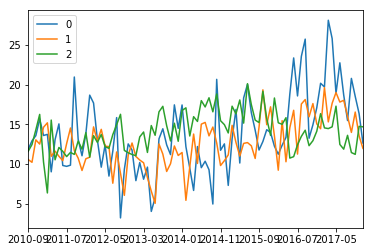

In [102]:
print(5)
print(list_of_file_names[5])
test_plot(read_data_list_2, range(3), 5, 7) 

In [103]:
read_data_list_2[4].head()

,RegionID,RegionName,City,County,State,Metro,SizeRank,2010-09,2010-10,2010-11,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,61639,10025,New York,New York,NY,New York,1,7.392590,13.074145,12.695547,...,8.807328,8.263237,6.648931,6.491591,8.335646,6.492719,8.875274,9.642772,9.286666,8.277206
1,84654,60657,Chicago,Cook,IL,Chicago,2,16.340299,13.081332,14.026773,...,12.375672,11.485071,15.159539,14.839257,17.647782,20.177685,18.024643,15.304427,14.667661,14.726743
2,61637,10023,New York,New York,NY,New York,3,12.186720,11.638770,7.655341,...,10.182349,6.764525,10.091701,8.837330,7.816984,7.855542,8.100517,11.446507,11.079352,8.860353
3,84616,60614,Chicago,Cook,IL,Chicago,4,17.792587,12.668053,14.826102,...,17.059765,12.823876,16.553104,17.885887,17.329921,17.223605,15.213034,15.553613,14.176803,11.024541
4,84640,60640,Chicago,Cook,IL,Chicago,6,18.180274,20.764426,16.193795,...,14.159167,10.902248,10.502337,11.814394,13.341936,18.346213,14.198792,17.244003,17.194427,12.693815


4
./zip_2/Zip_Listings_PriceCut_SeasAdj_Condominum.csv


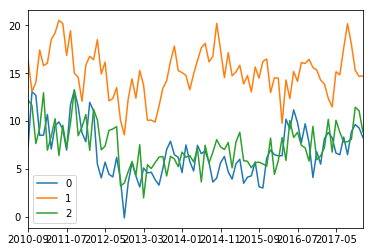

In [105]:
print(4)
print(list_of_file_names[4])
test_plot(read_data_list_2, range(3), 4, 7) 

In [106]:
read_data_list_2[3].head()

,RegionID,RegionName,City,County,State,Metro,SizeRank,2010-09,2010-10,2010-11,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,61639,10025,New York,New York,NY,New York,1,6.570249,12.756489,12.653012,...,8.957706,8.092414,6.480599,6.177025,7.665733,6.469490,9.404843,9.676821,9.492042,8.906575
1,84654,60657,Chicago,Cook,IL,Chicago,2,15.579002,13.075950,13.952516,...,15.755058,14.290530,15.893672,16.286275,17.861111,19.319142,18.503196,15.883284,14.974776,14.327006
2,61637,10023,New York,New York,NY,New York,3,10.488983,10.645493,6.854426,...,9.678688,7.003463,9.805996,8.826919,8.150643,7.876773,7.945232,11.375511,10.889501,8.891182
3,84616,60614,Chicago,Cook,IL,Chicago,4,15.635451,11.931660,14.343009,...,16.517161,14.367707,17.300677,17.922804,17.525769,16.831844,14.833764,15.849112,14.012810,11.321840
4,93144,79936,El Paso,El Paso,TX,El Paso,5,11.526950,12.340532,14.182885,...,14.255366,14.465085,16.970951,12.229700,11.674127,13.516093,11.524604,11.422401,14.644128,14.365685


3
./zip_2/Zip_Listings_PriceCut_SeasAdj_AllHomes.csv


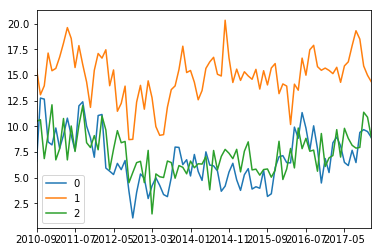

In [107]:
print(3)
print(list_of_file_names[3])
test_plot(read_data_list_2, range(3), 3, 7) 

In [108]:
read_data_list_2[2].head()

,RegionName,RegionType,City,CountyName,Metro,StateFullName,DataTypeDescription,2010-01,2010-02,2010-03,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,10025,Zip,New York,New York,New York,New York,All Homes,176,179,199,...,140,142,149,144,142,132,142,188,177,139
1,60657,Zip,Chicago,Cook,Chicago,Illinois,All Homes,666,726,825,...,320,338,348,373,391,389,412,408,344,278
2,10023,Zip,New York,New York,New York,New York,All Homes,224,236,263,...,294,338,366,375,348,314,352,377,374,335
3,77494,Zip,Cinco Ranch,Fort Bend,Houston,Texas,All Homes,822,842,952,...,678,783,839,894,932,828,736,696,689,632
4,75070,Zip,McKinney,Collin,Dallas-Fort Worth,Texas,All Homes,902,935,1056,...,282,310,367,414,496,643,608,616,601,491


2
./zip_2/InventoryMeasure_Zip_Public.csv


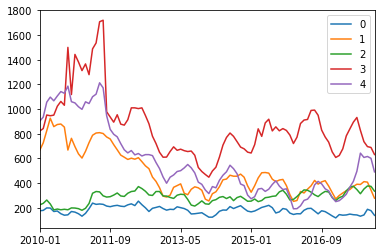

In [109]:
print(2)
print(list_of_file_names[2])
test_plot(read_data_list_2, range(5), 2, 7) 

In [110]:
read_data_list_2[1].head()

,RegionName,RegionType,City,CountyName,Metro,StateFullName,DataTypeDescription,2010-01,2010-02,2010-03,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,10025,Zip,New York,New York,New York,New York,All Homes,196,194,191,...,146,135,130,129,135,142,151,165,167,158
1,60657,Zip,Chicago,Cook,Chicago,Illinois,All Homes,777,794,832,...,338,323,322,335,348,359,368,364,350,342
2,10023,Zip,New York,New York,New York,New York,All Homes,246,249,243,...,305,321,338,347,342,339,349,359,362,362
3,77494,Zip,Cinco Ranch,Fort Bend,Houston,Texas,All Homes,905,911,926,...,705,737,758,772,788,773,748,743,744,740
4,75070,Zip,McKinney,Collin,Dallas-Fort Worth,Texas,All Homes,1004,1022,1063,...,330,337,359,384,438,512,557,582,585,563


1
./zip_2/InventoryMeasure_SSA_Zip_Public.csv


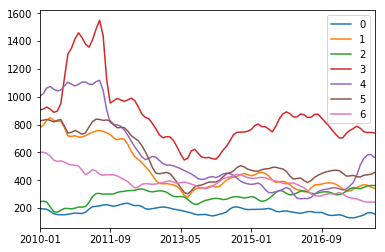

In [111]:
print(1)
print(list_of_file_names[1])
test_plot(read_data_list_2, range(7), 1, 7) 

In [112]:
read_data_list_2[0].head()

,RegionType,RegionName,State,CBSA Title,SizeRankCity,SizeRankMetro,PctPriceCut,DaysOnMarket,BuyerSellerIndex,BuyerSellerIndexMetro
0,Zip,44240,OH,"""Akron, OH""",3102,73,10.638298,62.5,2.500000,5.132128
1,Zip,44203,OH,"""Akron, OH""",3210,73,11.864407,67.0,5.714286,5.132128
2,Zip,44224,OH,"""Akron, OH""",3295,73,11.224490,55.0,1.785714,5.132128
3,Zip,44266,OH,"""Akron, OH""",4372,73,12.751678,74.0,10.000000,5.132128
4,Zip,44221,OH,"""Akron, OH""",4390,73,9.774436,65.0,3.214286,5.132128


In [224]:
useful_df[3].head()

,RegionName,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
4270,99801,5.001480,12.059667,9.721639,12.823805,12.067908,6.735467,12.817048,5.351705,7.022677,...,8.149935,7.839226,8.340472,11.016614,13.717871,12.825190,12.298428,13.377564,11.830469,10.323291
4756,99709,13.332107,11.447750,20.230705,17.569812,9.501848,16.866147,25.336712,14.339757,14.388552,...,15.020218,15.179652,9.608745,15.497014,13.444893,21.787553,14.004356,17.560603,14.040229,12.349473
5743,99705,14.238275,11.455669,21.931982,19.715816,13.152595,16.048516,16.539511,13.047547,15.500396,...,17.252181,14.419267,13.725248,14.145342,15.184207,21.538185,15.127410,18.841846,19.314115,18.508919
6128,99701,12.502596,3.868248,11.226388,8.029469,11.557336,13.020347,6.255375,7.774582,10.831500,...,11.990818,11.121010,13.573817,14.626545,17.361696,14.490435,12.286012,12.098577,12.474354,16.429898
6859,99669,12.342694,9.547881,9.399721,11.789248,13.575353,8.824402,11.448679,12.713187,12.052649,...,8.814888,10.137303,13.932264,12.073197,9.835698,14.488406,11.190449,15.390050,11.528148,13.687983


In [253]:
test_df = useful_df[3]
test_df = test_df.loc[:, '2011-01':]

In [254]:
test_year_difference = test_df['2017-12'] / test_df['2016-12']
test_df['test_year_difference'] = test_year_difference

In [255]:
test_df.head()

,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,...,2017-08,2017-09,2017-10,2017-11,2017-12,test_year_difference,2016_mean,2016_std,2016_min,2016_max
4270,12.067908,6.735467,12.817048,5.351705,7.022677,11.403385,3.948526,10.416996,11.053552,12.477303,...,12.825190,12.298428,13.377564,11.830469,10.323291,1.237568,10.068442,3.062214,5.088322,15.190752
4756,9.501848,16.866147,25.336712,14.339757,14.388552,11.076664,9.436303,14.841445,16.882054,18.584083,...,21.787553,14.004356,17.560603,14.040229,12.349473,0.784626,14.867648,1.965726,10.527746,17.673090
5743,13.152595,16.048516,16.539511,13.047547,15.500396,18.073011,14.187450,12.416356,20.583079,9.272206,...,21.538185,15.127410,18.841846,19.314115,18.508919,2.050586,13.001790,3.032479,9.026161,19.540471
6128,11.557336,13.020347,6.255375,7.774582,10.831500,12.234200,6.677422,12.528873,6.226229,11.232388,...,14.490435,12.286012,12.098577,12.474354,16.429898,1.435843,12.777948,2.078412,10.289255,16.890567
6859,13.575353,8.824402,11.448679,12.713187,12.052649,9.105020,13.523014,8.234307,11.401915,9.971783,...,14.488406,11.190449,15.390050,11.528148,13.687983,1.584108,13.092470,3.342978,8.640817,21.497990


In [245]:
test_agg = test_df.loc[:,'2016-01':'2016-12']

In [250]:
test_agg.max(axis=1)

4270     15.190752
4756     17.673090
5743     19.540471
6128     16.890567
6859     21.497990
4119     17.762656
4379     16.943255
7316     18.733456
7731     10.288310
4365     21.608367
8909     21.923049
8375     31.551204
6448     21.005695
6450     23.292638
5765     24.490218
2808     26.494751
2182     22.380295
1731     20.692913
5060     23.526796
5658     21.558463
5228     16.149584
1365     15.562721
4857     15.342281
6989     20.788350
2130     14.279893
7620     13.349084
3878     20.013800
673      19.417684
8349     15.812836
221      12.193257
           ...    
9152     15.204331
9289     16.966124
8619     14.370031
9417     17.272729
10061    13.893831
491      15.002986
9270     27.046275
7720     25.316990
7163     25.955075
4342     21.900536
4484     26.815215
7057     26.599548
5020     24.039900
7253     23.584999
3213     29.686203
7992     20.923315
8510     23.676981
6358     20.769206
8739     23.090895
6351     24.741025
9008     19.571006
5369     25.

In [247]:
test_agg.mean(axis=1) 

4270     10.068442
4756     14.867648
5743     13.001790
6128     12.777948
6859     13.092470
4119     14.753322
4379     12.412199
7316     16.195387
7731      6.838883
4365     17.459189
8909     14.920813
8375     18.297897
6448     17.002742
6450     18.733705
5765     18.005102
2808     20.607251
2182     17.435139
1731     16.614767
5060     18.682009
5658     17.269923
5228     11.562505
1365     12.023870
4857     10.450321
6989     11.369384
2130     11.611961
7620     11.147863
3878     13.327833
673      12.808682
8349     10.037655
221       9.922876
           ...    
9152      8.372895
9289     10.475600
8619      9.318124
9417     10.766084
10061     8.958718
491      11.414172
9270     18.189245
7720     18.473970
7163     18.908653
4342     16.125183
4484     17.611625
7057     18.511753
5020     17.371876
7253     16.801781
3213     19.611764
7992     16.354463
8510     16.872500
6358     17.297422
8739     18.379092
6351     16.077392
9008     14.633733
5369     20.

In [251]:
test_df['2016_mean'] = test_agg.mean(axis=1) 
test_df['2016_std'] = test_agg.std(axis=1) 
test_df['2016_min'] = test_agg.min(axis=1) 
test_df['2016_max'] = test_agg.max(axis=1) 

In [252]:
test_df.head()

,RegionName,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,...,2017-08,2017-09,2017-10,2017-11,2017-12,test_year_difference,2016_mean,2016_std,2016_min,2016_max
4270,99801,5.001480,12.059667,9.721639,12.823805,12.067908,6.735467,12.817048,5.351705,7.022677,...,12.825190,12.298428,13.377564,11.830469,10.323291,1.237568,10.068442,3.062214,5.088322,15.190752
4756,99709,13.332107,11.447750,20.230705,17.569812,9.501848,16.866147,25.336712,14.339757,14.388552,...,21.787553,14.004356,17.560603,14.040229,12.349473,0.784626,14.867648,1.965726,10.527746,17.673090
5743,99705,14.238275,11.455669,21.931982,19.715816,13.152595,16.048516,16.539511,13.047547,15.500396,...,21.538185,15.127410,18.841846,19.314115,18.508919,2.050586,13.001790,3.032479,9.026161,19.540471
6128,99701,12.502596,3.868248,11.226388,8.029469,11.557336,13.020347,6.255375,7.774582,10.831500,...,14.490435,12.286012,12.098577,12.474354,16.429898,1.435843,12.777948,2.078412,10.289255,16.890567
6859,99669,12.342694,9.547881,9.399721,11.789248,13.575353,8.824402,11.448679,12.713187,12.052649,...,14.488406,11.190449,15.390050,11.528148,13.687983,1.584108,13.092470,3.342978,8.640817,21.497990


In [260]:
lst = ['2015', '2016']
new = []
for ls in lst:
    new_str = ls + '-04'
    new.append(new_str)
new

['2015-04', '2016-04']

In [265]:
good_range = list(range(72))
good_range.remove(0)
good_range.remove(1)
good_range.remove(2)
good_range

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71]

In [372]:
def build_feature_list(good_range, df_list):
    year_list = ['2011', '2012', '2013', '2014', '2015', '2016']
    feature_df_list = []
    bugs = []
    for num in good_range:
        df = df_list[num]
        try:
            df = df.loc[:, '2011-01':'2016-12']
            features = pd.DataFrame()
            #features['zip'] = df['RegionName']
            for i, year in enumerate(year_list):
                mean = df.loc[:, year + '-01': year + '-12'].mean(axis=1)
                features[year + '_mean'] = mean
                std = df.loc[:, year + '-01': year + '-12'].std(axis=1)
                features[year + '_std'] = std
                mn = df.loc[:, year + '-01': year + '-12'].min(axis=1)
                features[year + '_min'] = mn
                mx = df.loc[:, year + '-01': year + '-12'].max(axis=1)
                features[year + '_max'] = mx
                features[year + '_swing'] = mx - mn
                change = df[year + '-12'] - df[year + '-01']
                features[year + '_change'] = change
                if i > 0:
                    yoy = features[year + '_mean'] / df.loc[:, year_list[i - 1] + '-01': year_list[i - 1] + '-12'].mean(axis=1)
                    features[year + '_yoy'] = yoy
                    #features[year + '_gain'] = np.where(features[year + '_yoy']>1, 1, 0)
                    #big swing and gain, big swing and loss, big swing and big gain, big swing and big loss
            feature_df_list.append(features)
        except:
            bugs.append(num)
    return feature_df_list, bugs
    

In [373]:
feature_df_list, bug_list = build_feature_list(good_range, useful_df)


In [374]:
feature_df_list[0]

,2011_mean,2011_std,2011_min,2011_max,2011_swing,2011_change,2012_mean,2012_std,2012_min,2012_max,...,2015_swing,2015_change,2015_yoy,2016_mean,2016_std,2016_min,2016_max,2016_swing,2016_change,2016_yoy
RegionName,,,,,,,,,,,,,,,,,,,,,
99801,9.310209,2.944113,3.948526,12.817048,8.868522,-2.369770,8.136485,3.436430,3.786004,14.723430,...,10.922510,4.423798,1.147612,10.068442,3.062214,5.088322,15.190752,10.102429,-2.221789,0.815729
99709,14.946397,4.360379,9.436303,25.336712,15.900409,5.824062,13.842236,2.040111,10.402749,16.453952,...,7.886666,-3.434515,0.890816,14.867648,1.965726,10.527746,17.673090,7.145344,-1.084411,1.052896
99705,14.737880,3.007675,9.272206,20.583079,11.310873,-0.965515,14.121202,2.229902,9.937863,18.068721,...,9.822462,0.918776,0.778620,13.001790,3.032479,9.026161,19.540471,10.514310,-7.450660,0.959551
99701,10.091596,2.632644,6.226229,13.020347,6.794118,1.073704,13.299571,4.214313,8.873875,21.746954,...,9.228073,-1.347940,0.930134,12.777948,2.078412,10.289255,16.890567,6.601312,-2.607957,0.805753
99669,10.798498,1.890953,8.234307,13.575353,5.341046,-4.060254,9.651472,1.428610,7.102004,11.841231,...,8.172776,4.037065,1.052458,13.092470,3.342978,8.640817,21.497990,12.857173,-1.582450,1.163023
99654,13.214379,2.157889,8.444920,16.213183,7.768263,-2.143277,14.191593,2.700768,10.333211,17.143203,...,5.434156,-0.658071,1.021385,14.753322,2.134131,11.209180,17.762656,6.553477,-2.365091,0.881913
99645,12.583851,2.262103,9.426753,17.054173,7.627420,2.443949,14.289590,2.297234,11.803779,20.138787,...,5.254662,-3.765729,0.997660,12.412199,2.414573,8.647923,16.943255,8.295332,-0.282694,0.843407
99611,11.209943,2.305143,6.815841,14.813535,7.997694,-2.398504,11.642218,2.698411,6.508712,15.324572,...,9.115521,8.552684,1.192126,16.195387,2.175274,11.189822,18.733456,7.543634,-1.258443,1.183676
99603,8.471080,2.482062,4.842049,13.457436,8.615387,-0.221229,8.567598,3.197106,5.900274,18.073028,...,5.739527,3.078668,1.198967,6.838883,2.280977,1.977511,10.288310,8.310799,-0.103445,0.765450


In [300]:
bug_list

[34, 45, 48, 52, 59, 60, 61, 62, 63, 64, 65, 67, 68, 70, 71]

In [390]:
def merge_dataframes(feature_df_list):
    df_1 = feature_df_list[0]
    for df in feature_df_list[1:]:
        df_1 = pd.merge(df_1, df, left_index=True, right_index=True, how='outer')
    return df_1
        

In [393]:
X = merge_dataframes(feature_df_list)
X.tail()

,2011_mean_x,2011_std_x,2011_min_x,2011_max_x,2011_swing_x,2011_change_x,2012_mean_x,2012_std_x,2012_min_x,2012_max_x,...,2015_swing_y,2015_change_y,2015_yoy_y,2016_mean_y,2016_std_y,2016_min_y,2016_max_y,2016_swing_y,2016_change_y,2016_yoy_y
RegionName,,,,,,,,,,,,,,,,,,,,,
99709,14.946397,4.360379,9.436303,25.336712,15.900409,5.824062,13.842236,2.040111,10.402749,16.453952,...,0.046971,0.046971,-0.890296,0.048043,0.014847,0.027583,0.071696,0.044113,0.006359,4.154441
99712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.059971,0.055702,0.333645,0.058742,0.013431,0.030547,0.077129,0.046582,-0.017640,-14.320149
99801,9.310209,2.944113,3.948526,12.817048,8.868522,-2.369770,8.136485,3.436430,3.786004,14.723430,...,0.075475,-0.075475,0.050715,-0.022789,0.024616,-0.047337,0.012188,0.059525,0.052582,-14.033968
99835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002694,0.001342,5.585394,0.012510,0.017565,-0.004944,0.046459,0.051403,0.048261,-5.974465


In [394]:
test_merge = pd.merge(feature_df_list[2], feature_df_list[3], left_index=True, right_index=True, how='inner')

In [395]:
test_merge.head()

,2011_mean_x,2011_std_x,2011_min_x,2011_max_x,2011_swing_x,2011_change_x,2012_mean_x,2012_std_x,2012_min_x,2012_max_x,...,2015_swing_y,2015_change_y,2015_yoy_y,2016_mean_y,2016_std_y,2016_min_y,2016_max_y,2016_swing_y,2016_change_y,2016_yoy_y
RegionName,,,,,,,,,,,,,,,,,,,,,
99801,8.737707,2.668976,3.270054,12.457820,9.187766,-1.638298,8.375887,3.294851,4.551599,14.925776,...,5450.0,3450.0,0.955588,8691.666667,1910.358526,5050.0,11450.0,6400.0,0.0,1.065373
99705,14.771745,3.035814,9.219219,20.683859,11.464640,-0.895525,14.162195,2.279545,9.922699,18.353496,...,2500.0,-2450.0,0.994444,5446.041667,868.623165,4000.0,7500.0,3500.0,1300.0,0.986751
99669,10.946112,1.839319,8.474595,14.084393,5.609798,-4.590275,9.620692,1.472063,7.015491,11.650463,...,9000.0,-4150.0,1.132951,7420.833333,2233.775680,5000.0,10500.0,5500.0,3500.0,0.900860
99654,13.307311,2.180717,8.626867,16.407887,7.781020,-2.413729,14.321280,2.768978,10.590992,17.464021,...,4500.0,4500.0,1.115228,5587.500000,745.935959,5000.0,7450.0,2450.0,-1000.0,0.979189
99645,12.752939,2.262451,9.737056,17.329209,7.592153,2.098543,14.359215,2.348984,11.907258,20.364713,...,8500.0,-1500.0,0.952453,5816.708333,1607.789285,4000.0,9100.0,5100.0,-4100.0,1.106189
